# <center> <img src="figs/logo_facens.png" alt="Logo Facens" width="110" align="left"/>  <br/> <center>Facens<br/>
</p>

<br/>
  
<font size="3"><center>Prof. Julio Cesar Mastrodomenico</center></font>




# Aprendizado de Máquinas
### 2022PGS2M1
----

## <center> $K$-Vizinhos mais próximos </center>

Implementação e utilização do algoritimo *K* - Vizinhos mais próximos

<img src="figs/knn_img.png" width="350" height="350" />

Banco de dados:
- Social_Network_Ads.csv
- Atrib_dataset.csv
- spam.csv
- titanic.csv


### Exercícios

## 1) Relembrando Naive Bayes e criando uma classe para o algoritimo, ao estilo Sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
import random

In [2]:
# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv('datasets/Atrib_dataset.csv', sep=',', index_col=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


In [3]:
# Visualização das 6 primeiras linhas do nosso dataset
df_dataset.head(n=6)

,Atrib1,Atrib2,Atrib3,Atrib4,Atrib5,Classe
0,0,0,1,1,0,0
1,0,1,1,0,1,1
2,1,1,1,0,0,1
3,0,0,0,0,0,0
4,1,1,1,0,1,1
5,0,1,1,1,0,1


In [4]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values

# pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values

# imprime as 5 primeiras linhas da matriz X
print('X:', X[0:5,:])

# imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

X: [[0 0 1 1 0]
 [0 1 1 0 1]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [1 1 1 0 1]]
Y: [0 1 1 0 1]


In [5]:
# Probabilidade das Classes
pPositivo = sum(Y==1)/len(Y)
pNegativo = sum(Y==0)/len(Y)

print('Probabilidade da classe ser 1 (Positivo): %1.2f%%' %(pPositivo*100))
print('Probabilidade da classe ser 0 (Negativo): %1.2f%%' %(pNegativo*100))

Probabilidade da classe ser 1 (Positivo): 54.00%
Probabilidade da classe ser 0 (Negativo): 46.00%


In [6]:
def calcular_probabilidades(X, Y):
    """
    CALCULARPROBABILIDADES Computa a probabilidade de ocorrencia de cada 
    atributo por rotulo possivel. A funcao retorna dois vetores de tamanho n
    (qtde de atributos), um para cada classe.
    
    CALCULARPROBABILIDADES(X, Y) calcula a probabilidade de ocorrencia de cada atributo em cada classe. 
    Cada vetor de saida tem dimensao (n x 1), sendo n a quantidade de atributos por amostra.
    """
    
    #  inicializa os vetores de probabilidades
    pAtrPositivo = np.zeros(X.shape[1])
    pAtrNegativo = np.zeros(X.shape[1])

    for i in range(len(X[0])):
        pAtrPositivo[i] = sum(Y[np.where(X[:,i]==1)]==1)/sum(Y==1)
        pAtrNegativo[i] = sum(Y[np.where(X[:,i]==1)]==0)/sum(Y==0)    
    
    ##########################################################################

    return pAtrPositivo, pAtrNegativo

pAtrPositivo, pAtrNegativo = calcular_probabilidades(X,Y)

print('A probabilidade esperada para P(Atributo1=1|Classe=1) = %.2f%%' %(pAtrPositivo[0]*100))

A probabilidade esperada para P(Atributo1=1|Classe=1) = 52.96%


In [7]:
def classificacao(x,pPositivo,pNegativo,pAtrPositivo,pAtrNegativo):
    """
    Classifica se a entrada x pertence a classe 0 ou 1 usando
    as probabilidades extraidas da base de treinamento. Essa funcao 
    estima a predicao de x atraves da maior probabilidade da amostra  
    pertencer a classe 1 ou 0. Tambem retorna as probabilidades condicionais
    de positivo e negativo, respectivamente.
    
    """

    #  inicializa a classe e as probabilidades condicionais
    classe = 0;
    probPositivo= 0;
    probNegativo = 0;
    
    probPositivo = np.prod(abs((1-x)-pAtrPositivo))*pPositivo
    probNegativo = np.prod(abs((1-x)-pAtrNegativo))*pNegativo
         
    if probPositivo>probNegativo:
        classe = 1
    else:
        classe = 0

    ########################################################################## 

    return classe, probPositivo, probNegativo 

resultados = np.zeros( X.shape[0] )

for i in range(X.shape[0]):
    resultados[i], probPositivo, probNegativo = classificacao(X[i,:],pPositivo,pNegativo,pAtrPositivo,pAtrNegativo)

# calcular acuracia
acuracia = np.sum(resultados==Y)/len(Y)

print('Acuracia obtida pelo seu classificador foi = %.2f%%\n' %( acuracia*100 ) )

Acuracia obtida pelo seu classificador foi = 76.60%



In [8]:
# Depois do modelo treinado, neste caso com as probabilidades calculadas, podemos
# predizer para um novo valor, seja ele x1_novo
x1_novo = np.array([0,1,0,1,1])

classe, probPositivo, probNegativo = classificacao(x1_novo, pPositivo, pNegativo, pAtrPositivo, pAtrNegativo)

if classe ==1:
    print('\n>>> Predicao = Positivo!')       
else:
    print('\n>>> Predicao = Negativo!')

print('\n>>>>>> Prob. Positivo = %0.6f!' %(probPositivo))
print('\n>>>>>> Prob. Negativo = %0.6f!\n\n'  %(probNegativo))


>>> Predicao = Positivo!

>>>>>> Prob. Positivo = 0.019366!

>>>>>> Prob. Negativo = 0.009483!




In [9]:
#Initializing the Naive Bayes Class
class NaiveBayes():

    #Class responsible for Naive Bayes
    def __init__(self):

        self.labels = 0

    def fit(self, X, Y):
        '''
        Função de Fitting, treinamento da classe
        Args: Entrada de features e as classes de saída
        Retorna: Nulo, armazena internamente as probabilidades
        '''
        
        # Inicia as variáveis que irão armazenar as labels e probabilidades 
        self.labels = np.unique(Y)
        self.pClasse = np.zeros((len(np.unique(Y)),1))
        self.pAtrLabel = np.zeros((len(self.labels), X.shape[1]))
        
        # Calcula a probabilidade de cada classe
        for i in self.labels:
            self.pClasse[i] = sum(Y==i)/len(Y)
            
        # Calcula a probabilidade de cada atributo ocorrer em cada classe
        for i in self.labels:
            for j in range(len(X[0])):
                self.pAtrLabel[i][j] = sum(Y[np.where(X[:,j]==1)]==i)/sum(Y==i)

    def predict(self, x):
        '''
        Função de predict de novos dados.
        Args: Vetor a ser predito
        Retorna: Classe predita
        '''
        
        # Inicia a variável de saida
        probClasse = np.zeros((len(self.labels)))
    
        # Calcula a probabilidade de cada classe pertencer ao vetor a ser predito
        for i in range(len(self.labels)):
            probClasse[i] = np.prod(abs((1-x)-self.pAtrLabel[i]))*self.pClasse[i]
        
        # Retorna a classe máxima
        return np.argmax(probClasse)
    
    def predict_proba(self, x):
        '''
        Função de predict de novos dados.
        Args: Vetor a ser predito
        Retorna: Classe predita
        '''
        
        # Inicia a variável de saida
        probClasse = np.zeros((len(self.labels)))
    
        # Calcula a probabilidade de cada classe pertencer ao vetor a ser predito
        for i in range(len(self.labels)):
            probClasse[i] = np.prod(abs((1-x)-self.pAtrLabel[i]))*self.pClasse[i]
        
        # Retorna a classe máxima
        return probClasse

In [10]:
naive_class = NaiveBayes()

In [11]:
naive_class.fit(X,Y)

In [13]:
naive_class.predict(x1_novo)

1

In [14]:
resultados = np.zeros( X.shape[0] )

for i in range(X.shape[0]):
    resultados[i] = naive_class.predict(X[i,:])
    
acuracia = np.sum(resultados==Y)/len(Y)

print('Acuracia obtida pelo seu classificador foi = %.2f%%\n' %( acuracia*100 ) )

Acuracia obtida pelo seu classificador foi = 76.60%



In [15]:
naive_class.predict_proba(x1_novo)

array([0.00948265, 0.01936649])

In [16]:
naive_class.labels

array([0, 1], dtype=int64)

## Criando a Classe do Naive Bayes Gaussiano

In [24]:
class NaiveBayes:

    def __init__(self):
        pass

    def fit(self, X, y):
        
        # Criando os vetores
        self.n_samples, self.n_features = X.shape
        self.n_classes = len(np.unique(y))

        # Criando as matrizes
        self.mean = np.zeros((self.n_classes, self.n_features))
        self.variance = np.zeros((self.n_classes, self.n_features))
        self.priors = np.zeros(self.n_classes)

        for c in range(self.n_classes):

            X_c = X[y == c]

            self.mean[c, :] = np.mean(X_c, axis=0)
            self.variance[c, :] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / self.n_samples
 
    def predict(self, X):
        
        # for each sample x in the dataset X
        y_hat = [self.get_class_probability(x) for x in X]
        
        return np.array(y_hat)

    def get_class_probability(self, x):
        # Probabilidade de cada classe
        
        # Armazenar os posterior
        posteriors = list()

        for c in range(self.n_classes):
            mean_t = self.mean[c]
            var_t = self.variance[c]
            prior_t = np.log(self.priors[c])

            posterior = np.sum(np.log(self.gaussian_density(x, mean_t, var_t)))
            posterior += prior_t # posterior = prior_t + posterior

            posteriors.append(posterior)
        
        return np.argmax(posteriors)

    def gaussian_density(self, x, mean, var):
        # implementation of gaussian density function
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))

        return const * proba

In [34]:
gaussian_nb = NaiveBayes()

In [66]:
data = datasets.load_iris()

In [67]:
X = data['data']
y = data['target']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
gaussian_nb.fit(X_train, y_train)

In [39]:
gaussian_nb.mean

array([[4.99      , 3.4525    , 1.45      , 0.245     ],
       [5.9195122 , 2.77073171, 4.24146341, 1.32195122],
       [6.53333333, 2.96666667, 5.52051282, 2.        ]])

In [40]:
predictions = gaussian_nb.predict(X_test)

In [41]:
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [42]:
np.sum(y_test==predictions) / len(y_test)

1.0

## Criando nossa Classe de KNN

In [62]:
#Initializing the KNN Class
class KNN():

    #Class responsible for K-nearest neighbors
    #Initialize only with the number os neighbors, default =3
    def __init__(self, k=3, d='euclidean'):
        self.k = k
        self.d = d
    
    #Help function to calculate the distance
    def distance(self, x):
        if self.d == 'euclidean':
            D = np.sqrt(((x - self.X)**2).sum(axis=1))
        else:
            D = np.abs(x - self.X).sum(axis=1)
            
        return D
    
    #Fit method to store the dataset
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    #Predict method which return the K-nearest neighbor for given sample
    def predict(self, X_pred):
        
        label = np.zeros(X_pred.shape[0])
        # iterar em X_pred e retornar os labels
        for i in range(len(X_pred)):
            # Calculo da distancia para todas amostras
            dist = self.distance(X_pred[i])
            
            # Sorting dos valores .argsort()
            kviz = dist.argsort()
            
            # Pegar os K vizinhos mais proximos [0:self.k]
            idx_viz = kviz[0:self.k]
            
            # Vetor de saida com as classes dos k vizinhos
            y_viz = self.y[idx_viz]
            
            # Voting
            vote = np.bincount(y_viz)
            
            label[i] = np.argmax(vote)
            
        # Retorna a classe do novo elemento
        return label

In [76]:
knn = KNN()

In [77]:
knn.fit(X_train, y_train)

In [78]:
predictions = knn.predict(X_test)

In [79]:
predictions

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [80]:
np.sum(y_test==predictions) / len(y_test)

1.0

## Testando nossa classe com o Iris Dataset

In [81]:
# Carregando o dataset
iris = datasets.load_iris(as_frame=True)

In [82]:
# Visualizando os dados
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

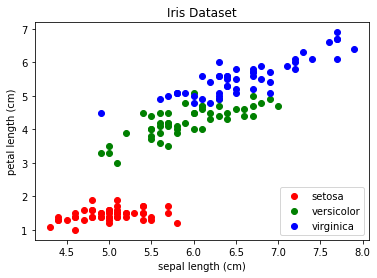

In [84]:
# Plot de visualização dos dados
n_samples = len(iris.target)
for t in set(iris.target):
    x = [iris.data.iloc[i,0] for i in range(n_samples) if iris.target[i]==t]
    y = [iris.data.iloc[i,2] for i in range(n_samples) if iris.target[i]==t]
    plt.scatter(x,
                y,
                color=['red', 'green', 'blue'][t],
                label=iris.target_names[t])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('Iris Dataset')
plt.legend(iris.target_names, loc='lower right')
plt.show()

In [85]:
# Split do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data.values, iris.target.values, test_size = 0.2, random_state = 0)

In [87]:
# Instanciando nossa classe
knn = KNN(5, 'mann')

In [88]:
# Realizando o fit, neste caso passando os dados para o algoritmo iterar no predict
knn.fit(X_train, y_train)

In [89]:
# Predizendo uma das linhas do teste
results = knn.predict(X_test)

acuracia = np.sum(results == y_test) / len(y_test)

print(acuracia)

1.0


## Testando agora com o KNN do Sklearn

In [90]:
# Importando a lib
from sklearn.neighbors import KNeighborsClassifier

In [91]:
# Importar a classe e realizar o predict
knn_sk = KNeighborsClassifier(3)

In [92]:
accuracy = []

for i in [1, 3, 5, 7]:
    knn_sk = KNeighborsClassifier(i)
    knn_sk.fit(X_train, y_train)
    resultado = knn_sk.predict(X_test)
    acc = np.sum(resultado==y_test) / len(y_test)
    accuracy.append(acc)
    print(acc)

1.0
0.9666666666666667
0.9666666666666667
1.0


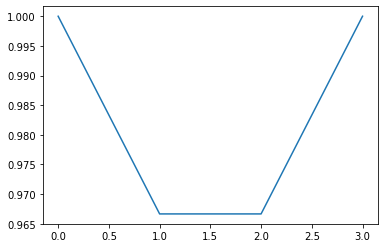

In [93]:
plt.plot(accuracy)

## Métricas:

- Matriz de Confusão

<img src="figs/cm_wiki.png" width="250" height="250" />


- Acurácia

<img src="figs/acu_wiki.png" width="300" height="300" />


- Precisão

<img src="figs/precision.png" width="200" height="200" />


- recall

<img src="figs/recall.png" width="200" height="200" />


- Precisão / Recall

<img src="figs/Precisionrecall_img.png" width="300" height="300" />


- F-Beta Score

<img src="figs/f_score.png" width="200" height="200" />



## Dataset Social_Ads com visualização do decision boundary do KNN

In [95]:
# Importando o dataset e separando as variáveis
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [96]:
# Realizando o split do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [97]:
# Vamos ver o que temos na variável X_train
X_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [98]:
# Vamos realizar uma normalização devido a grande diferença nas grandezas

# Instanciamos ela
sc = StandardScaler()

# Para utilizar precisamos realizar um fit e um transform, para que realize o calculo de normalização
# e aplique no X_train
X_train = sc.fit_transform(X_train)

# Posteriormente, só aplicamos no X_test
X_test = sc.transform(X_test)

In [99]:
# Observando novamente a variável
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [100]:
# Vamos treinar utilizando o K Neighbors Classifier
# Instanciando
knn = KNeighborsClassifier()

# Treinando
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
# Com o algoritimo treinado, podemos predizer novos valores
# Como por exemplo, uma pessoa de 30 anos, com salario de 87000, compraria?

# Para tal, precisamos transformar o valor para dentro da normalização e dai predizer
knn.predict(sc.transform([[30, 87000]]))

array([0], dtype=int64)

In [102]:
# Verificando a métrica final, com o resultado do X_test
y_pred = knn.predict(X_test)

In [103]:
# Matriz de confusão e classification report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


### Vamos visualizar os resultados do treinamento e do teste

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


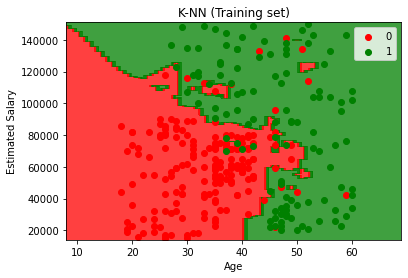

In [142]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


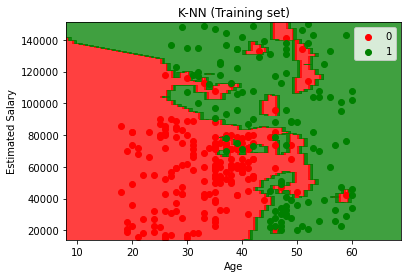

In [195]:
# Com k = 1
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


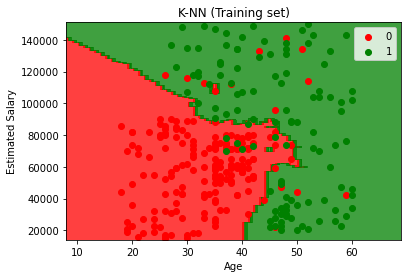

In [201]:
# Com k = 5
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Teste

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


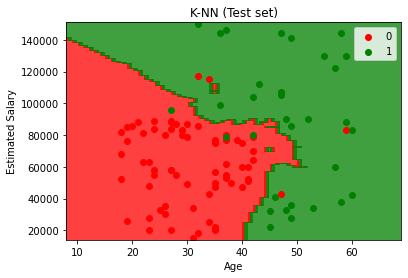

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Utilizando o dataset "Spam", aqui é necessária uma outra biblioteca para trabalhar a questão do texto

In [104]:
# Importando o csv para um pandas dataframe
df = pd.read_csv("datasets/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
# Convertendo as variáveis categóricas para números
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [106]:
# Realizando o split dos nossos dados
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2, random_state=0)

In [107]:
# Aqui a biblioteca sklearn tem uma função chamada CountVectorizer, que transforma a ocorrência de 
# cada palavra em uma matriz esparsa
from sklearn.feature_extraction.text import CountVectorizer

# Instanciamos
vect = CountVectorizer(stop_words='english')

# Realizamos a transformação dos valores, somente as características (X)
X_train_count = vect.fit_transform(X_train)

In [108]:
# Descrição da matriz criada
X_train_count

<4457x7526 sparse matrix of type '<class 'numpy.int64'>'
	with 34625 stored elements in Compressed Sparse Row format>

In [109]:
# Observando a dimensão da matriz
X_train_count.shape

(4457, 7526)

In [114]:
# Instanciamos nosso modelo
# Binário, mudança para Hamming, p = 1, norma L1
classifier = KNeighborsClassifier(n_neighbors=3, p=2)

# Treinando o modelo
classifier.fit(X_train_count, y_train)

KNeighborsClassifier(n_neighbors=3)

In [115]:
# Emails novos para ser predita a classe
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Transformação do email em matriz esparsa
emails_count = vect.transform(emails)

# Predição
classifier.predict(emails_count)

array([0, 0], dtype=int64)

In [116]:
# Verificação do score do modelo através da acurácia
X_test_count = vect.transform(X_test)
classifier.score(X_test_count, y_test)

0.9273542600896861

In [117]:
# F1-score
y_pred = classifier.predict(X_test_count)
f1_score(y_test, y_pred)

0.6610878661087867

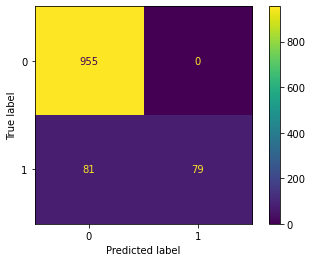

In [118]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Exercício dataset Titanic

In [127]:
# Importando o csv para um pandas dataframe
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [128]:
# Sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [129]:
df['Embarked'] = df['Embarked'].fillna('S')

In [130]:
# Instanciando o labelEncoder
le = LabelEncoder()

df['Encoder'] = le.fit_transform(df['Embarked'])

In [131]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Encoder
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0,2
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1,2
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,2
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1,0


## Exercício dataset Wine ( direto do sklearn )

$ from sklearn import datasets

$ wine = datasets.load_wine()

In [22]:
from sklearn import datasets
wine = datasets.load_wine(as_frame=True)

## Exercício dos Digitos

In [132]:
from sklearn.datasets import load_digits
digits = load_digits()

In [133]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [134]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [135]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [136]:
df.shape

(1797, 65)

In [159]:
num = 10
arr = df.iloc[num, :-1].values

In [160]:
arr.shape

(64,)

In [161]:
arr.reshape(1,64)

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
        14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
        16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
         0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
        10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

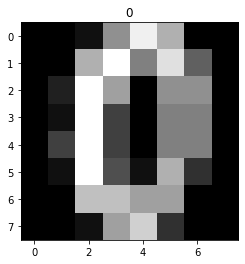

In [162]:
plt.imshow(arr.reshape(8, 8), cmap='gray')
plt.title(str(df.iloc[num, -1]))
plt.show()

## K-Means

## $Não$ Supervisionado

Vamos agora entender como o algoritmo de Clusterização/Agrupamento funciona

<img src="figs/kmeans_img.png" width="600" height="600" />

Banco de dados:
- Mall_Customers.csv
- Cluster data files 2D
- data.csv

### Exercícios

In [163]:
# Vamos ler os data files, criar uma função para isso
def read_file(filename):
    lista = list()
    with open(filename, 'r') as info:
        for data in info:
            data = data.strip()
            data = data.split()
            lista.append([float(x) for x in data])
    return lista

In [164]:
X = np.array(read_file('datasets/3clusters_2D_573p.dat'))

In [165]:
X

array([[15.55, 28.65],
       [14.9 , 27.55],
       [14.45, 28.35],
       ...,
       [35.25, 26.  ],
       [35.7 , 26.15],
       [34.4 , 25.6 ]])

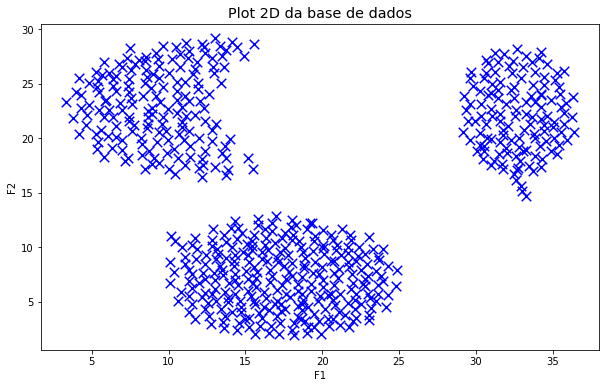

In [166]:
# função para plotar os dados
def visualizarDados(X,Y):
    """
    Função usada para plotar os dados
    
    PLOTARDADOS(X,Y) plota os dados e seta os rotulos x e y da
    figura.
    """
    
    # definindo o tamanho da figura 
    plt.figure(figsize=(10,6))
    
    # plota os dados
    plt.scatter( X, Y, marker='x', label = 'Dados', color='blue', s=90) 
    
    # define os nomes do eixo x e do eixo y
    plt.xlabel(r'F1',fontsize='medium') 
    plt.ylabel(r'F2',fontsize='medium') 

    #define o título do gráfico
    plt.title('Plot 2D da base de dados', fontsize='x-large')
    
    
# chamando a função que plota os dados   
visualizarDados(X[:,0],X[:,1])
plt.show()

In [167]:
def findClosestCentroids(X, centroids):
    """
    Calcula o centróide mais próximo de cada um dos exemplos 
    
    Parâmetros:
    -----------
    X: é uma matriz, onde cada linha representa um exemplo do problema avaliado
    
    centroids: é uma matriz, onde cada linha representa um centróide
    
    Saída:
    idx: um vetor que contém o índice do centróide mais próximo de cada objeto
    """
    
    n = X.shape[0] # quantidade de amostras
    
    # inicializa o valor de K
    K = centroids.shape[0];

    # Inicialização dos índices de cada linha
    idx = np.zeros( X.shape[0], dtype=int ) 

    for i in range(n):
        
        idx[i] = np.argmin(np.sqrt(np.sum((X[i]-centroids)**2,axis=1)))
            
    return idx

In [168]:
# define uma quantidade de centróides
K = 3

# criar os k centróides iniciais
initial_centroids = np.array( [[20,20],[30,25],[25,15]] )

idx = findClosestCentroids(X, initial_centroids)

In [169]:
idx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [170]:
def calculateCentroids(X, idx, K):
    """
    Retorna os novos centróides calculando a média das amostras de cada 
    centróide atual. 
    
    Esta função deve retornar uma matriz de centroides, onde cada linha
    representa um centróide.
    
    Parâmetros:
      X   - é a base de dados, onde cada linha representa uma amostra.
      idx - é um vetor onde cada elemento possui valor entre [0..K]. O elemento
            de índice i representa o índice do centróide mais próximo a i.
    """
    
    # varíaveis úteis
    m, n = X.shape # quantidade de amostras e número de atributos

    # você precisa retornar a seguinte variável corretamente
    centroides = np.zeros( [K, n] )
    
    for i in np.unique(idx):
        
        centroides[i] = np.mean(X[np.where(idx == i)],axis=0)    

    ##########################################################################

    return centroides

In [171]:
# chama a função
centroides = calculateCentroids(X, idx, K)

print('Novos centróides calculados a partir dos K centróides iniciais')
print(centroides);

Novos centróides calculados a partir dos K centróides iniciais
[[10.10774648 20.32535211]
 [32.75805085 22.56313559]
 [18.92975207  7.16446281]]


In [199]:
K = 3 # quantidade de centróides

max_iters = 5 # máximo de iterações que serão executadas

# Para facilitar, vamos criar manualmente os centróides 
# iniciais. Porém, na prática, os centróides iniciais devem ser
# gerados automaticamente. Uma das formas de fazer isso é 
# escolhendo aleatoriamente K amostras para serem os 
# K centróides iniciais.
# initial_centroids = np.array( [[20,20],[30,25],[25,15]] )

# initial_centroids = np.array( [[30,10],[30,11],[30,12]] )

# Iniciando de forma randomica, levando em consideração o valor máximo de X
initial_centroids = np.array( [[random.random()*36,random.random()*36],
                               [random.random()*36,random.random()*36],
                               [random.random()*36,random.random()*36]] )

In [200]:
def executa_kmedias(X, initial_centroids, max_iters, saveHistory = False):
    '''
    Roda o método K-médias sobre a base de dados X, onde cada linha de X
    é uma amostra.
    
    Esta função deve retornar os centróides encontrados na última iteração.
    Ela deve retornar também o vetor idx, onde cada elemento possui valor 
    entre [0..K]. O elemento de índice i representa o índice do centróide
    mais próximo do dado i.
    
    Parâmetros:
       X                 - é a base de dados, onde cada linha representa uma amostra.
       initial_centroids - é uma matriz de centróides, onde cada linha representa
                           um centróide.
       max_iters         - é o máximo de iterações para o método               
    '''

    #  inicializa alguns parâmetros
    
    m, n = X.shape # m é o número de amostras, n é o número de atributos
    
    # inicializa K com o número de centróides que é igual ao 
    # ao número de linhas da matriz initial_centroids
    K = initial_centroids.shape[0]
    
    centroids = initial_centroids # inicializa a matriz de centroides
    previous_centroids = centroids  # inicializa a matriz que vai guardar os centroides
    
    # inicializa o vetor que irá guardar o índice do centróide mais próximo de cada amostra.
    idx = np.zeros( m ) 
    
    if saveHistory:
        # inicializa uma variável do tipo lista que irá guardar a matriz de centróides 
        # e o vetor de índices dos centróides mais próximos obtidos em cada interação
        history = [] 
    
    #  executa o K-médias
    for i in range(max_iters):
        
        # imprime o número da iteração atual
        print('K-Médias - Iteração %d/%d' %(i, max_iters));
    
        # para cada amostra de X, encontra o centróide mais próximo
        idx = findClosestCentroids(X, centroids)

        if saveHistory:
            # salva o histórico
            history.append({'centroids': centroids, 'idx': idx})
            
        # dada a lista de centróides mais próximos de cada amostra
        # calcula o novo centroide.
        centroids = calculateCentroids(X, idx, K);
    
    if saveHistory:
        return centroids, idx, history
    else:
        return centroids, idx

In [201]:
centroids, idx, history = executa_kmedias(X, initial_centroids, max_iters, saveHistory = True)
print('\nK-médias finalizado.\n')

K-Médias - Iteração 0/5
K-Médias - Iteração 1/5
K-Médias - Iteração 2/5
K-Médias - Iteração 3/5
K-Médias - Iteração 4/5

K-médias finalizado.



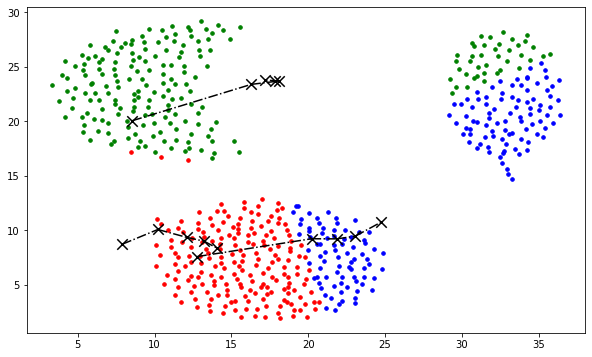

In [202]:
# cria a função para plotar os dados
def visualizarDados_centroids(X, centroids, idx, history):
    
    # define o tamanho da figura 
    plt.figure(figsize=(10,6))
    
    lcolors = ['b', 'g', 'r', 'c', 'm', 'y', 'w']
    
    for i in range( centroids.shape[0] ):
        
        # plota os dados
        plt.scatter( X[idx==i,0], X[idx==i,1], marker='.', label = 'Dados', color=lcolors[i], s=50) 
   
    for j in range( len(history) ):
        
        for i in range( centroids.shape[0] ):
            # plota os dados
            plt.scatter( history[j]['centroids'][i,0], history[j]['centroids'][i,1], marker='x', color='black', s=110) 

            if j>0:
                plt.plot( [history[j-1]['centroids'][i,0], history[j]['centroids'][i,0]], [history[j-1]['centroids'][i,1], history[j]['centroids'][i,1]], color='k', linestyle='-.')  
        
    plt.show()

# chama a função que plota os dados   
visualizarDados_centroids(X, initial_centroids, idx, history)

In [237]:
# Definindo nossa classe K-Means
class Kmeans_custom():
    
    # Função __init__
    def __init__(self, X, k):
        self.X = X
        self.k = k
        self.initial_centroids = np.random.random((self.k, self.X.shape[1]))*self.X.max()

    # Função achar centroides proximos
    def find_closest_centroids(self, centroides):
        n = self.X.shape[0] # quantidade de amostras
        # Inicialização dos índices de cada linha
        idx = np.zeros(n, dtype=int) 
        for i in range(n):
            idx[i] = np.argmin(np.sqrt(np.sum((self.X[i]-centroides)**2,axis=1)))
        return idx
    
    # Função calcular centroides
    def calculate_centroids(self, idx, centroides):
        for i in np.unique(idx):
            centroides[i] = np.mean(self.X[np.where(idx == i)],axis=0)
        return centroides

    # Função fit (self, max_iters, save_history=True)
    def fit(self, max_iters, save_history=True):
        
        #  inicializa alguns parâmetros
        m, n = self.X.shape # m é o número de amostras, n é o número de atributos

        centroides = self.initial_centroids.copy() # inicializa a matriz de centroides

        # inicializa o vetor que irá guardar o índice do centróide mais próximo de cada amostra.
        idx = np.zeros(m) 

        if save_history:
            # inicializa uma variável do tipo lista que irá guardar a matriz de centróides 
            # e o vetor de índices dos centróides mais próximos obtidos em cada interação
            history = [] 

        #  executa o K-médias
        for i in range(max_iters):

            # imprime o número da iteração atual
            print('K-Médias - Iteração %d/%d' %(i, max_iters));

            # para cada amostra de X, encontra o centróide mais próximo
            idx = self.find_closest_centroids(centroides)

            if save_history:
                # salva o histórico
                history.append({'centroids': centroides.copy(), 'idx': idx})

            # dada a lista de centróides mais próximos de cada amostra
            # calcula o novo centroide.
            centroides = self.calculate_centroids(idx, centroides)
            
        print('Fim de treino')
        
        self.class_centroids = centroides.copy()

        if save_history:
            return centroids, idx, history    
    
    # Função de predict (self, x)
    def predict(self, x):
        # Inicialização dos índices de cada linha
        idx = np.zeros(x.shape[0], dtype=int) 
        for i in range(x.shape[0]):
            idx[i] = np.argmin(np.sqrt(np.sum((x[i]-self.class_centroids)**2,axis=1)))
        return idx, self.class_centroids

In [213]:
kmeans = Kmeans_custom(X, 3)

In [214]:
initial_centroids, idx, hist = kmeans.fit(10)

K-Médias - Iteração 0/10
K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
Fim de treino


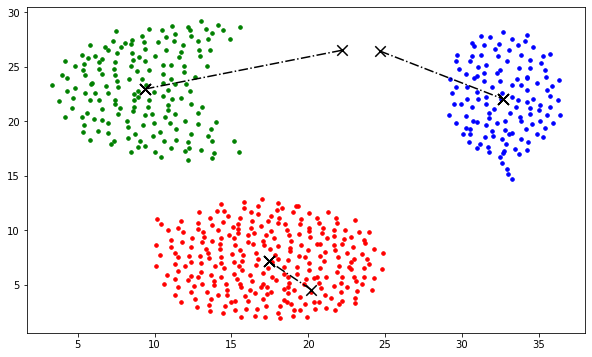

In [215]:
# chama a função que plota os dados   
visualizarDados_centroids(X, initial_centroids, idx, hist)

In [216]:
# Realizando um predict
pred, classe = kmeans.predict(np.array([[30, 20]]))

In [217]:
pred

array([0])

## Utilização e visualização do Mall Customers

In [218]:
# Importando o dataset
dataset = pd.read_csv('datasets/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [220]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Visualizando o método do cotovelo

In [221]:
# Importando o Kmeans do Sklearn
from sklearn.cluster import KMeans

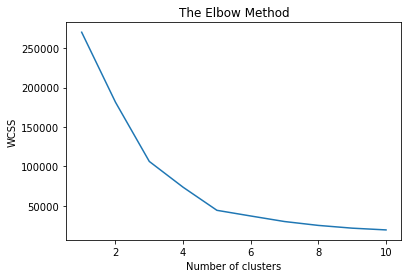

In [222]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [223]:
# Treinando o modelo
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

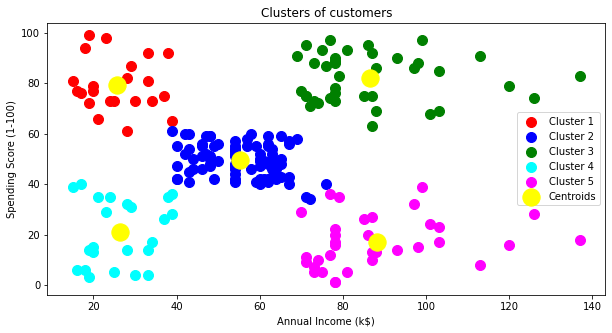

In [224]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Aplicar o Kmeans no data.csv

In [334]:
# Importando o dataset
df_dataset = pd.read_csv( 'datasets/data.csv', sep=',') 

In [335]:
df_dataset.head()

,f1,f2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [336]:
# pega os valores do dataframe
X = df_dataset.values 

# imprime as 5 primeiras linhas da matriz X
print('X:', X[0:5,:])

X: [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


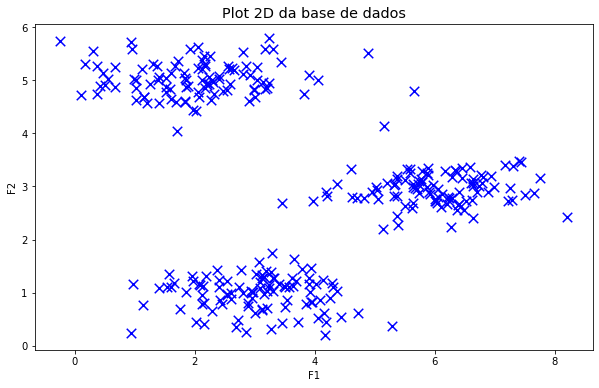

In [337]:
# chamando a função que plota os dados   
visualizarDados(X[:,0],X[:,1])
plt.show()

In [27]:
# Metodo do cotovelo


In [28]:
# Treinando com o número de clusters encontrado


In [29]:
# Treinando o modelo


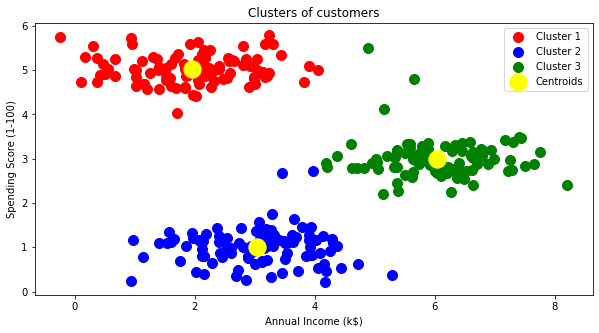

In [341]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Utilizando o Kmeans para compressão de cores em imagens

In [248]:
bolo = plt.imread('./datasets/image3.jpg')

In [249]:
bolo.shape

(125, 125, 3)

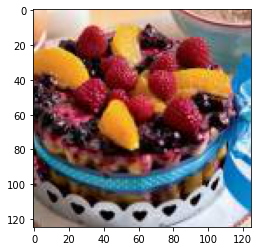

In [250]:
plt.imshow(bolo)
plt.show()

In [251]:
n_colors = 4

# Convertendo para o range[0-1]
bolo = bolo / 255

In [252]:
bolo

array([[[0.98431373, 0.84705882, 0.76862745],
        [0.99215686, 0.85490196, 0.77647059],
        [1.        , 0.85882353, 0.77254902],
        ...,
        [0.75686275, 0.56862745, 0.49019608],
        [0.64705882, 0.44705882, 0.37254902],
        [0.7254902 , 0.5254902 , 0.45098039]],

       [[0.96862745, 0.82745098, 0.74117647],
        [0.97647059, 0.83529412, 0.74901961],
        [0.98431373, 0.84313725, 0.74901961],
        ...,
        [0.69019608, 0.50588235, 0.42745098],
        [0.59607843, 0.40784314, 0.32941176],
        [0.62352941, 0.43529412, 0.35686275]],

       [[0.94509804, 0.8       , 0.69411765],
        [0.95294118, 0.80784314, 0.70196078],
        [0.97254902, 0.81568627, 0.71372549],
        ...,
        [0.55294118, 0.37647059, 0.29411765],
        [0.56470588, 0.38823529, 0.30588235],
        [0.60392157, 0.42745098, 0.34509804]],

       ...,

       [[0.39215686, 0.29803922, 0.25882353],
        [0.49803922, 0.40392157, 0.36470588],
        [0.55294118, 0

In [253]:
w, h, d = tuple(bolo.shape)

In [254]:
d

3

In [255]:
image_array = np.reshape(bolo, (w*h, d))

In [256]:
image_array.shape

(15625, 3)

In [257]:
X = image_array
print('\nNova dimensão: ',  X.shape)

print('\nValores dos 5 primeiros pixels:')
print(X[0:5,:])


Nova dimensão:  (15625, 3)

Valores dos 5 primeiros pixels:
[[0.98431373 0.84705882 0.76862745]
 [0.99215686 0.85490196 0.77647059]
 [1.         0.85882353 0.77254902]
 [0.99215686 0.85098039 0.75686275]
 [0.97647059 0.83529412 0.73333333]]


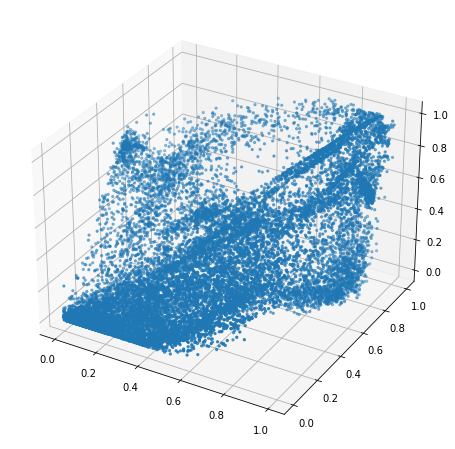

In [258]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], marker='.')
    
plt.show()

In [259]:
k_new = Kmeans_custom(X, n_colors)

In [260]:
_ = k_new.fit(max_iters=20)

K-Médias - Iteração 0/20
K-Médias - Iteração 1/20
K-Médias - Iteração 2/20
K-Médias - Iteração 3/20
K-Médias - Iteração 4/20
K-Médias - Iteração 5/20
K-Médias - Iteração 6/20
K-Médias - Iteração 7/20
K-Médias - Iteração 8/20
K-Médias - Iteração 9/20
K-Médias - Iteração 10/20
K-Médias - Iteração 11/20
K-Médias - Iteração 12/20
K-Médias - Iteração 13/20
K-Médias - Iteração 14/20
K-Médias - Iteração 15/20
K-Médias - Iteração 16/20
K-Médias - Iteração 17/20
K-Médias - Iteração 18/20
K-Médias - Iteração 19/20
Fim de treino


In [261]:
inds, cents = k_new.predict(X)

In [262]:
inds = inds.astype(int)

In [263]:
# Agora vamos mapear amostra da base de dados (pixel) por seu centróide mais próximo.
X_recuperado = cents[inds, :]

# Vamos restaurar as dimensões originais da matriz de pixels
X_recuperado = np.reshape(np.ravel(X_recuperado), (bolo.shape[0], bolo.shape[1], 3))

In [264]:
# Load Image and transform to a 2D numpy array.
w, h, d = tuple(X_recuperado.shape)

In [265]:
x_rec_array = np.reshape(X_recuperado, (w*h, d))

In [266]:
x_rec_array

array([[0.84363293, 0.79889702, 0.77290516],
       [0.84363293, 0.79889702, 0.77290516],
       [0.84363293, 0.79889702, 0.77290516],
       ...,
       [0.84363293, 0.79889702, 0.77290516],
       [0.84363293, 0.79889702, 0.77290516],
       [0.84363293, 0.79889702, 0.77290516]])

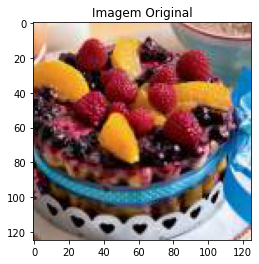

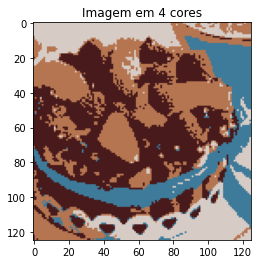

In [267]:
# Vamos plotar a imagem original
plt.imshow(bolo)
plt.title('Imagem Original')
plt.show()

# Vamos plotar a imagem compactada
plt.imshow(X_recuperado)
plt.title('Imagem em {} cores'.format(n_colors))
plt.show()

In [276]:
# Utilizando o Sklearn
kmeans = KMeans(n_clusters=32, random_state=0).fit(image_array)

In [277]:
labels = kmeans.predict(image_array)

In [278]:
kmeans.cluster_centers_

array([[0.15286882, 0.21379061, 0.27833008],
       [0.47116583, 0.40038   , 0.39616963],
       [0.90077799, 0.91807084, 0.94689437],
       [0.84769254, 0.51986133, 0.16982032],
       [0.03097159, 0.47979072, 0.74989976],
       [0.71008796, 0.59042514, 0.5602254 ],
       [0.54532595, 0.07396754, 0.11942316],
       [0.72443515, 0.73325371, 0.76479546],
       [0.15859649, 0.10278638, 0.12127279],
       [0.67085261, 0.39441507, 0.18601013],
       [0.91073846, 0.80765972, 0.76036508],
       [0.54894401, 0.30506969, 0.30984172],
       [0.16128381, 0.35202721, 0.4708433 ],
       [0.44165342, 0.73935347, 0.90556439],
       [0.71321696, 0.43100093, 0.43582221],
       [0.65362092, 0.15847495, 0.21339434],
       [0.92137255, 0.70919608, 0.35777451],
       [0.35894869, 0.28585037, 0.29821304],
       [0.56066863, 0.50869917, 0.50265487],
       [0.23810033, 0.04473135, 0.02923351],
       [0.3789326 , 0.47855167, 0.50769478],
       [0.93949297, 0.67263485, 0.16403908],
       [0.

In [279]:
x_rec = kmeans.cluster_centers_[labels, :]

In [280]:
# Vamos restaurar as dimensões originais da matriz de pixels
x_recovered = np.reshape(np.ravel(x_rec), (bolo.shape[0], bolo.shape[1], 3))

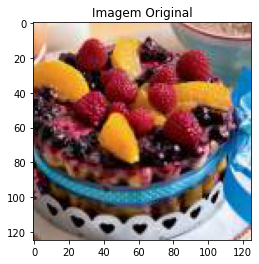

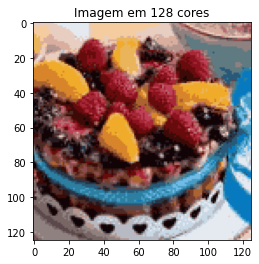

In [281]:
# Vamos plotar a imagem original
plt.imshow(bolo)
plt.title('Imagem Original')
plt.show()

# Vamos plotar a imagem compactada
plt.imshow(x_recovered)
plt.title('Imagem em {} cores'.format(128))
plt.show()

In [274]:
# Imagem do Cachorro
dog = plt.imread('./datasets/image1.jpg')

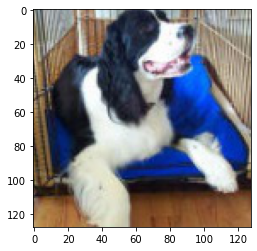

In [275]:
plt.imshow(dog)
plt.show()